In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
air = pd.read_csv('C:\\Users\\Anandh\\Data\\train.csv')

In [3]:
import numpy as np
%matplotlib inline

In [25]:
from matplotlib import pyplot as plt
air.date_account_created=air.date_account_created.astype('Datetime64')
air.timestamp_first_active=pd.to_datetime(air.timestamp_first_active)

air['date_first_booking'] = pd.to_datetime(air['date_first_booking'])
air.gender=air.gender.astype('unicode')
air.signup_method=air.signup_method.astype('str')
air.signup_flow=air.signup_flow.astype('Int64')


TypeError: cannot astype a datetimelike from [datetime64[ns]] to [datetime64]

# Data Understanding

A description of all data elements was provided as part of the Kaggle competition here: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/ and is also duplicated below alongwith the missing percentage:                            

Attribute	           Data Type	Description	                              %missing
id		               string       user id	                                  0%
date_account_created   date         the date of account creation	          0%
timestamp_first_active datetime		timestamp of the first activity, note 
                                    that it can be earlier than           	  0%
                                    date_account created or date_first_booking 
                                    since user can search before signing up
date_first_booking	   date         date of first booking                      58.30%
gender	               Nominal	    male, female, other	                      0%
age	                   Integer	    Ages <18 and >100 marked as null	      41.20%
signup_method	       Nominal	    the method of signup by user	          0%
signup_flow	           Integer	    the page a user came to signup up from	  0%
language	           Nominal	    international language preference	      0%
affiliate_channel	   Nominal	    what kind of paid marketing	              0%
affiliate_provider	   Nominal	    where the marketing is e.g. google, craigslist, other	0%
first_affiliate_tracked	Nominal	    whats the first marketing the user interacted with before the signing up	2.80%
signup_app	           Nominal	    application used for signing up	          0%
first_device_type	   Nominal	    device type which has the app used by user	0%
first_browser	       Nominal	    browser chosen by user for signing up	  0%
country_destination	   Nominal	    this is the target variable you are to predict	0%

Most of these attributes are categorical which were collected from users in USA with 12 possible destinations including other and non bookings. Most of missing data were found for date of first booking (as there can be bookings before dates considered in study) and age (as in most travel websites age is not required or optional). There were values of 1, 2014, 130 for age which may need to be imputed with median or marked as null. Imputation will not be applicable for categorical variables.

Some attributes like id, language may not be useful as most preferred language was english in the dataset and id's are just for unique numbering of users.

There are additional files provided, sessions, age_gender_bkts, countries which may be useful as additional features to the main dataset which provide more details of specific entities. For example, sessions data consists of action, action type, action detail, device type and time elapsed.



In [27]:
air_imputed_2 = air.replace(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'] ,[1,2,3,4,5,6,7,8,9,10,11,12]) 
air_imputed_2 = air.age.replace(to_replace='>100',value=np.nan)
air_imputed_2 = air.age.replace(to_replace='<18',value=np.nan)
air_imputed_2 = air.replace(to_replace=['MALE','FEMALE','OTHER'],value=[1,2,3])


In [29]:
air_imputed_2.dropna(inplace=True) 

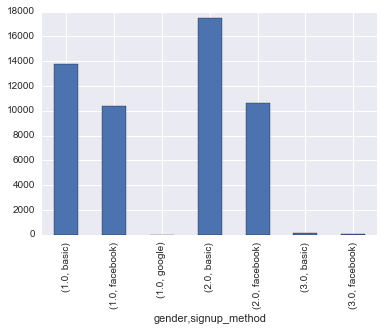

In [48]:
air_grouped_gender = air_imputed_2.groupby(by=['gender','signup_method'])
male_dest = air_grouped_gender.gender.count()
a = male_dest.plot(kind='bar', 
                   stacked=True)

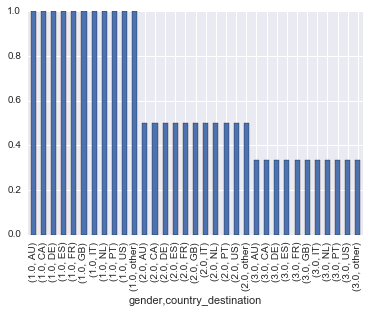

In [49]:
air_grouped_gender = air_imputed_2.groupby(by=['gender','country_destination'])
male_dest = air_grouped_gender.gender.count()/air_grouped_gender.gender.sum()
a = male_dest.plot(kind='bar', 
                   stacked=True)

In [13]:

# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline


In [14]:
print (air_grouped_gender)

In [26]:
for col in air:
   air[col].replace('-unknown-', np.nan, inplace=True)
   air[col].replace('-unknown- ', np.nan, inplace=True)    
   air[col].replace(' -unknown- ', np.nan, inplace=True)

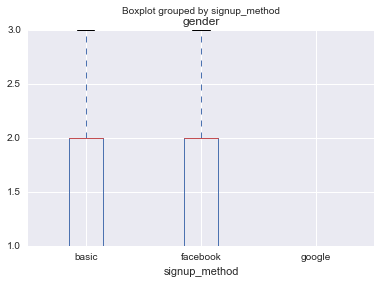

In [51]:
b = air_imputed_2.boxplot(column = 'gender', by = 'signup_method')

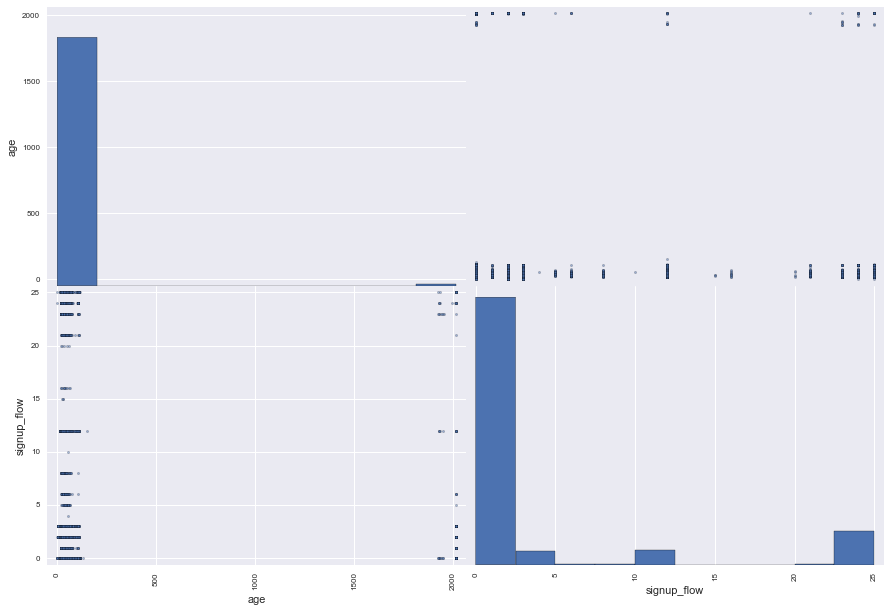

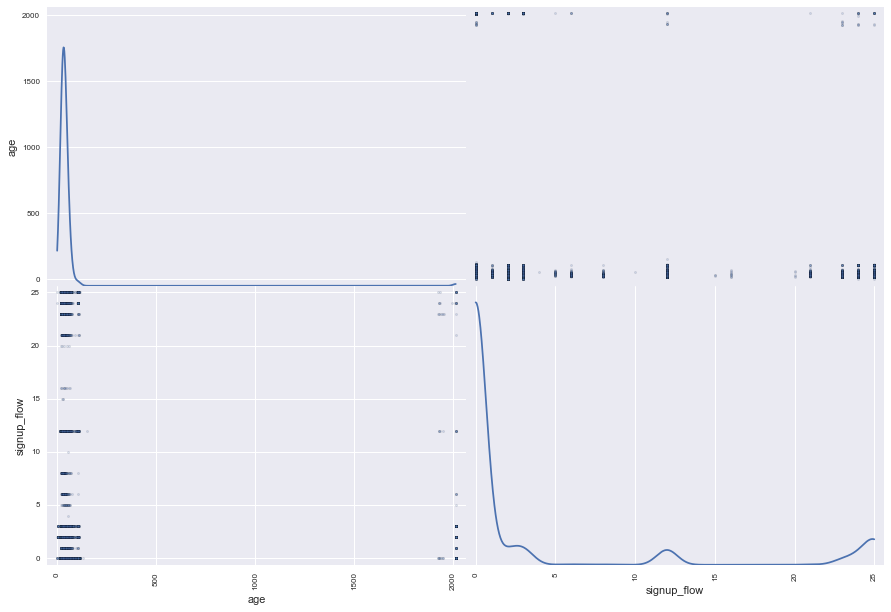

In [52]:
from pandas.tools.plotting import scatter_matrix

ax = scatter_matrix(air,figsize=(15, 10))
bx = scatter_matrix(air,alpha=0.2,figsize=(15, 10),diagonal = 'kde')

C:\Users\Anandh\Desktop\Anaconda\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Anandh\Desktop\Anaconda\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


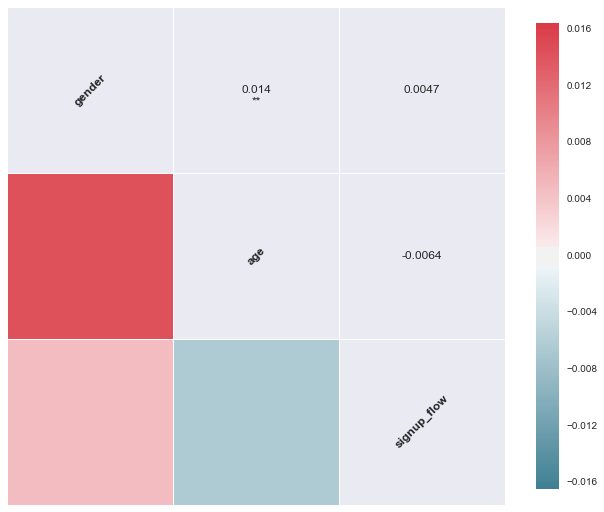

In [53]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.corrplot(air_imputed_2, 
             annot=True, # plot numeric annotations?
             sig_stars=True, # plot significance?
             diag_names=True, 
             cmap=cmap, 
             ax=ax)
f.tight_layout()

In [67]:
survival = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], 
                       air_imputed_2.first_device_type.astype(str))
print (survival)

first_device_type     Android Phone  Android Tablet  Desktop (Other)  \
gender signup_method                                                   
1.0    basic                     67              73              123   
       facebook                  59              36              103   
       google                     0               0                0   
2.0    basic                     82              94               66   
       facebook                  48              39               53   
3.0    basic                      1               0                1   
       facebook                   0               0                0   

first_device_type     Mac Desktop  Other/Unknown  SmartPhone (Other)  \
gender signup_method                                                   
1.0    basic                 7056              3                   1   
       facebook              5738              4                   0   
       google                   1              0               

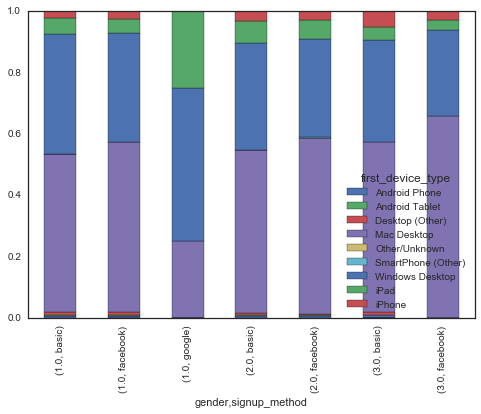

In [74]:
survival_rate = survival.div(survival.sum(1).astype(int),
                             axis=0) # normalize the value

# print survival_rate
survival_rate.plot(kind='bar', 
                   stacked=True)

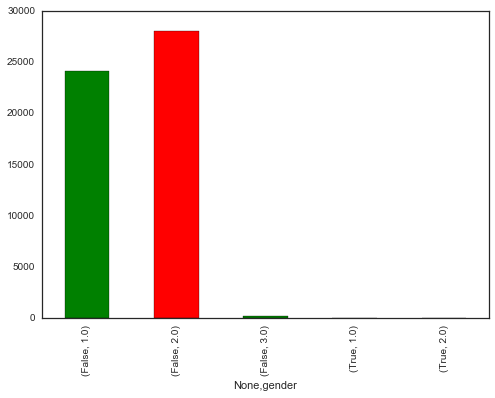

In [81]:
#air_grouped_date = if air.date_account_created > air.date_first_booking: 
air_grouped_date = air_imputed_2.groupby(by=[air.date_account_created > air.date_first_booking,'gender'])
dest = air_grouped_date.gender.count()
print (air_grouped_date)
a = dest.plot(kind='bar', 
                   stacked=True,color=['green','red'])

col_0                 False  True 
gender signup_method              
1.0    basic          13730      7
       facebook       10378      1
       google             4      0
2.0    basic          17439      8
       facebook       10601      6
3.0    basic            115      0
       facebook          32      0


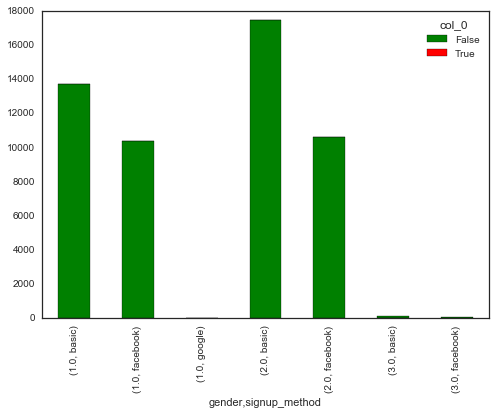

In [82]:
dates = pd.crosstab([ air_imputed_2['gender'],air_imputed_2['signup_method'] ], 
                       (air.date_account_created > air.date_first_booking).astype(bool))
print (dates)
dates.plot(kind='bar', stacked=True, color=['green','red'])